In [1]:
import pandas as pd

In [12]:
data = pd.read_csv("china_gdp.csv")
df = data

In [13]:
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [14]:
df.tail(20)

,Year,Value
35,1995,7.320320e+11
36,1996,8.608441e+11
37,1997,9.581594e+11
38,1998,1.025277e+12
39,1999,1.089447e+12
40,2000,1.205261e+12
41,2001,1.332235e+12
42,2002,1.461906e+12
43,2003,1.649929e+12
44,2004,1.941746e+12


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1012.0 bytes


In [16]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


In [17]:
df.isnull()

,Year,Value
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [18]:
df.isnull().sum()

,0
Year,0
Value,0


In [19]:
df.shape

(55, 2)

In [22]:
year_col = 'Year' if 'Year' in df.columns else df.columns[0]
gdp_col = 'Value' if 'Value' in df.columns else df.columns[1]

X = df[year_col].values
y = df[gdp_col].values

In [26]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def sigmoid(x, a, b, c, d):
    return a / (1 + np.exp(-b * (x - c))) + d

X_norm = (X - X.min()) / (X.max() - X.min())
p0 = [max(y), 1, np.median(X_norm), min(y)]

popt, _ = curve_fit(sigmoid, X_norm, y, p0, maxfev=10000)
a, b, c, d = popt

y_pred = sigmoid(X_norm, *popt)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Optimal Parameters: a={a:.3f}, b={b:.3f}, c={c:.3f}, d={d:.3f}")
print(f"R² = {r2:.4f}")
print(f"MAE = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")


Optimal Parameters: a=24520396528351.707, b=11.540, c=1.025, d=176185526995.872
R² = 0.9961
MAE = 120160225352.8150
RMSE = 154188857562.7574


In [27]:
import matplotlib.pyplot as plt

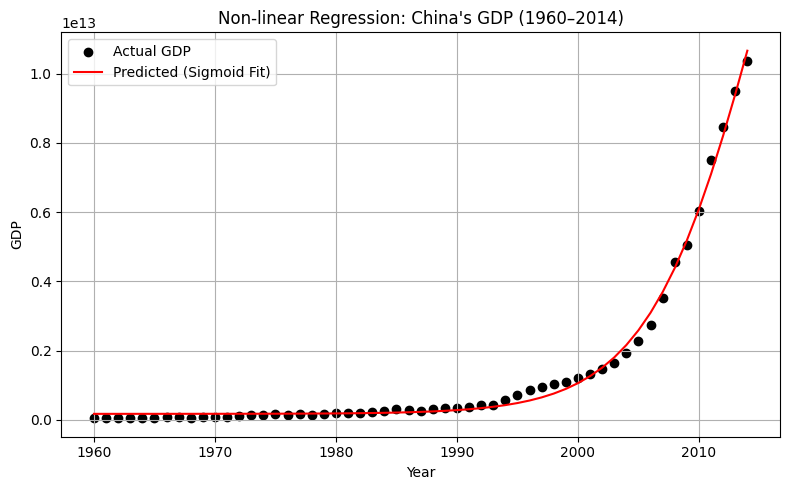

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='black', label='Actual GDP')
plt.plot(X, y_pred, color='red', linewidth=1.5, label='Predicted (Sigmoid Fit)')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("Non-linear Regression: China's GDP (1960–2014)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

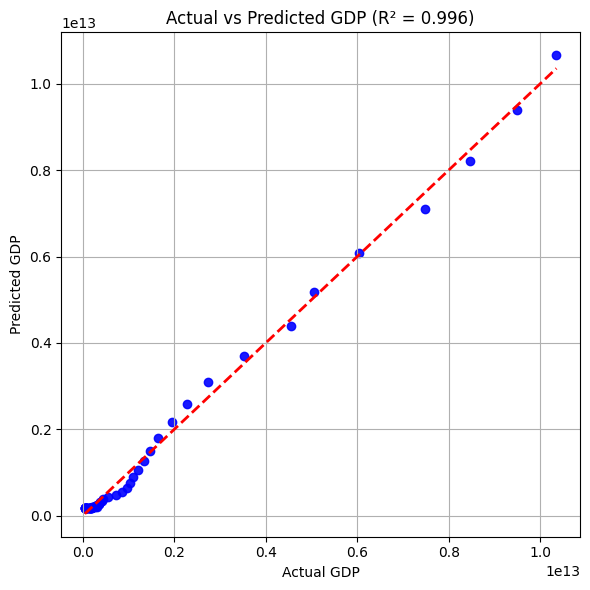

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, color='Blue', alpha=0.9)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")
plt.title(f"Actual vs Predicted GDP (R² = {r2:.3f})")
plt.grid(True)
plt.tight_layout()
plt.show()